In [1]:
import scipy.stats as sps
from statsmodels.stats.multitest import multipletests

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Task 3. Test some hypothesis, controling FWER on $\alpha$ level

In [71]:
data3 = pd.read_csv('./hw6t3v0.txt', sep=' ', header=None)
data3.head()

,0,1
0,783.1,1115.0
1,891.2,1200.9
2,825.8,1195.1
3,706.3,984.1
4,880.3,1206.0


In [72]:
fst_sample_3 = data3[0].values
snd_sample_3 = data3[1].values

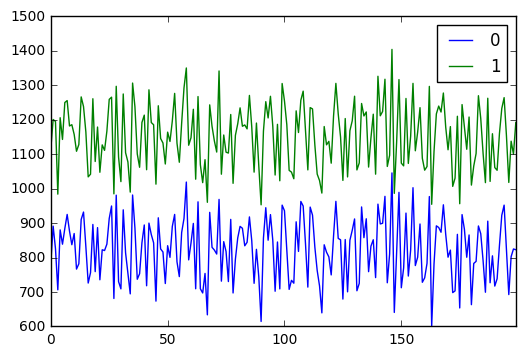

In [73]:
data3.plot()
plt.show()

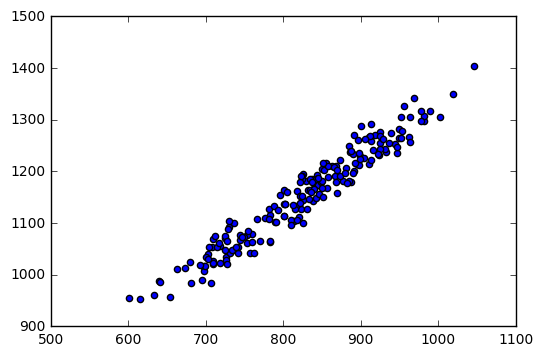

In [74]:
plt.scatter(fst_sample_3, snd_sample_3)
plt.show()

Ну, взглянув на данные видно, что коэффициент корреляции уж точно отличен от нуля и это отличие должно быть статистически значимым, убедимся, проверив гипотезу о некоррелируемости

Являются ли парными или независимыми? Нормальными или произвольными? Однородны ли?

Что-то нужно делать с тем, что 

Мы хотим контролировать FWER на уровне $\alpha$ = 0.1

In [75]:
len(fst_sample_3)

200

Так как выборка не сильно большого размера, то проблем с использованием критерия Шапиро-Уилка не будет. Для проверки нормальности воспользуемся им, а также критерием Лиллиефорса, ну и Андерсеном-Дарлингом. Предварительно взглянем на Q-Q plot, чтобы провести первоначальный анализ выборок

In [76]:
from statsmodels.stats.diagnostic import normal_ad

In [77]:
import statsmodels.api as sm

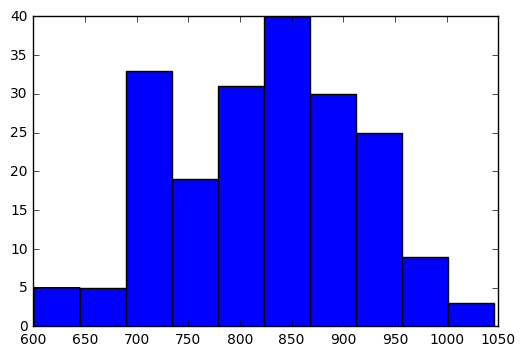

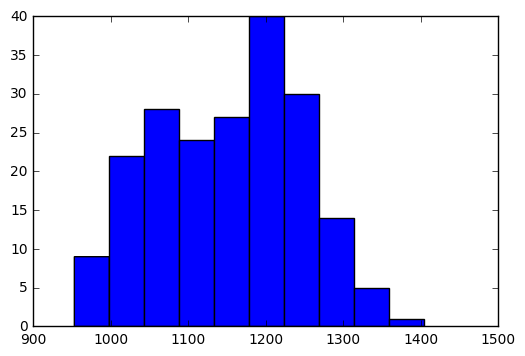

In [78]:
plt.hist(fst_sample_3)
plt.show()
plt.hist(snd_sample_3)
plt.show()

Гистограммы не дают явно понять, нормальна ли выборка

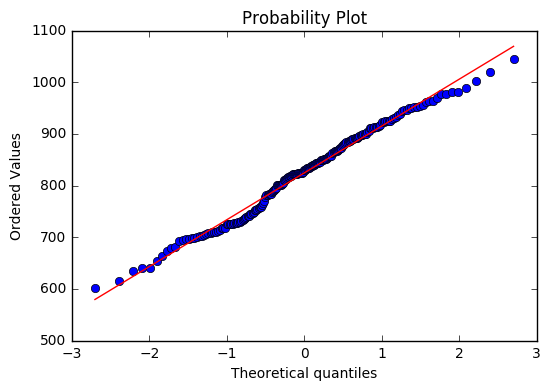

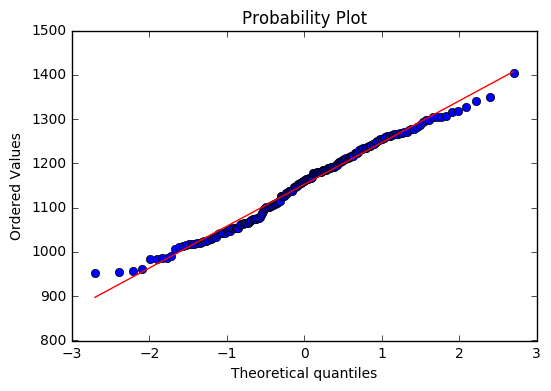

In [79]:
sps.probplot(fst_sample_3, plot=plt)

plt.show()
sps.probplot(snd_sample_3, plot=plt)
plt.show()

Вообще, точки довольно неплохо ложаться на прямую, но все же убедимся с помощью критериев проверки нормальности

Не забываем, что для того чтобы проверить пару выборок на однородность , сначала надо проверить их на равенство дисперсий, а далее на равенство матожиданий(если это нормальная выборка), а так можно воспользоваться ранговыми критериями, например

In [80]:
sps.shapiro(fst_sample_3) # На уровне значимости 0.1 мы можем отвергнуть гипотезу


(0.9869712591171265, 0.06311605125665665)

In [81]:
sps.shapiro(snd_sample_3) # На уровне значимости 0.1 мы можем отвергнуть гипотезу

(0.9842545390129089, 0.024712642654776573)

Так как мы не знаем, какова зависимость между выборками(но по графикам видно, что они почтни наверное парные, но тогда нужно это учесть, так как свойство независимости необходимо для работы некоторых критериев). Будем тогда пользвоваться критерями  проверки однородности, где это условие не нужно

In [82]:
p_values = []
# ----- CORRELATION TESTS ---------- #
p_values.append(sps.pearsonr(fst_sample_3, snd_sample_3))
p_values.append(sps.spearmanr(fst_sample_3, snd_sample_3))
p_values.append(sps.kendalltau(fst_sample_3, snd_sample_3))
# ------NORMALITY TESTS ------------ #
p_values.append(sps.shapiro(fst_sample_3))
p_values.append(sm.stats.lillifors(fst_sample_3))
p_values.append(normal_ad(fst_sample_3))
# snd
p_values.append(sps.shapiro(snd_sample_3))
p_values.append(sm.stats.lillifors(snd_sample_3))
p_values.append(normal_ad(snd_sample_3))
# -------SIMILARITY TESTS -----------
p_values.append(sps.wilcoxon(fst_sample_3, snd_sample_3))

In [83]:
p_values = np.array(p_values)
p_values

array([[  9.69240727e-001,   1.62817304e-122],
       [  9.68779544e-001,   6.94526674e-122],
       [  8.44489131e-001,   1.47274213e-070],
       [  9.86971259e-001,   6.31160513e-002],
       [  6.10787612e-002,   6.67946394e-002],
       [  9.12991788e-001,   1.97858752e-002],
       [  9.84254539e-001,   2.47126427e-002],
       [  6.74416758e-002,   2.73976833e-002],
       [  1.01275891e+000,   1.12102744e-002],
       [  0.00000000e+000,   1.43582281e-034]])

Сделаем теперь поправку на множественную проверку гипотез воспользовавшись методом Бенджамини-Иекутиели, ведь он является самым мощным среди тех, когда нам не известна зависимость статистик(ну а у нас они зависимы уж точно)

In [84]:
multipletests(p_values[:,0], alpha=0.1, method='hs')

(array([False, False, False, False, False, False, False, False, False,  True], dtype=bool),
 array([ 0.99999997,  0.99999997,  0.9999978 ,  0.99999997,  0.43289632,
         0.99999957,  0.99999997,  0.43289632,  1.        ,  0.        ]),
 0.010480741793785553,
 0.01)

Получаем, что мы можем отвергнуть лишь одну гипотезу(о том что они из одного распределения)

## Task 4  FDR

In [88]:
data4 = pd.read_csv('./hw6t4v0.txt', sep=' ', header=None)
data4.head()

,0,1
0,6934.9,4119.6
1,5959.3,3842.8
2,6018.9,4030.1
3,6018.4,5235.8
4,6693.0,5348.6


In [87]:
fst_sample_4 = data4[0].values
snd_sample_4 = data4[1].values

Аналогично предыдущему построим графики для наглядности

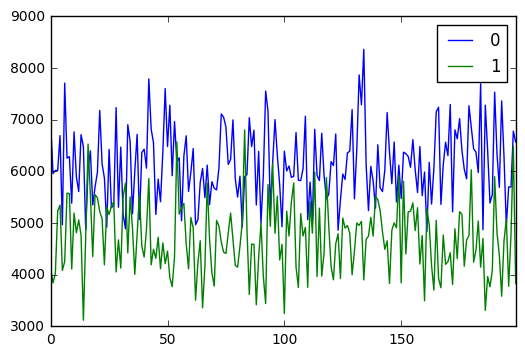

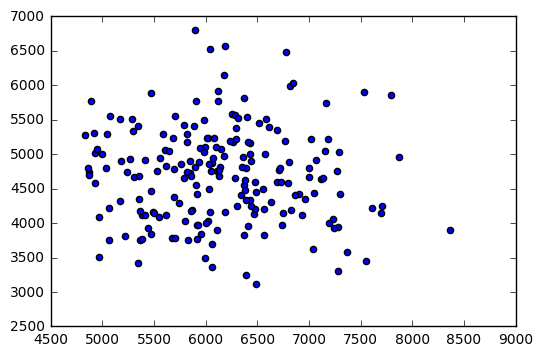

In [90]:
data4.plot()
plt.show()
plt.scatter(fst_sample_4, snd_sample_4)
plt.show()

Получили, что у нас широкое облако точек, что означает, что коэффициенты корреляции должны быть близкими к нулю

In [92]:
len(fst_sample_4) # Снова небольшая выборка -> Шапиро-Уилка без проблем можно использвать

200

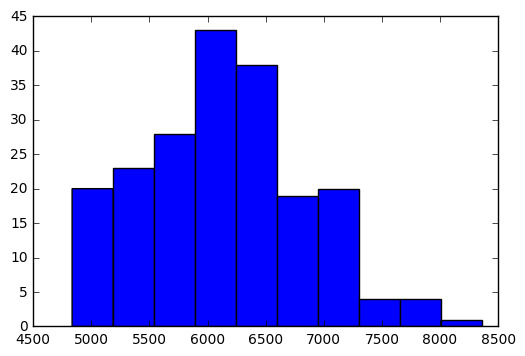

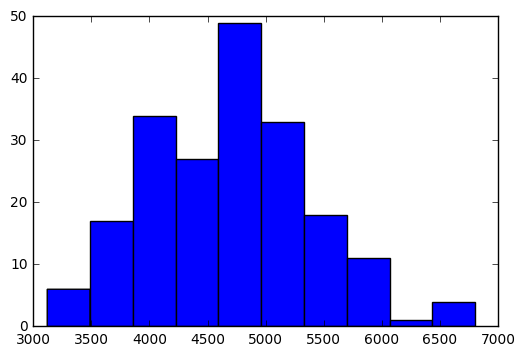

In [93]:
plt.hist(fst_sample_4)
plt.show()
plt.hist(snd_sample_4)
plt.show()

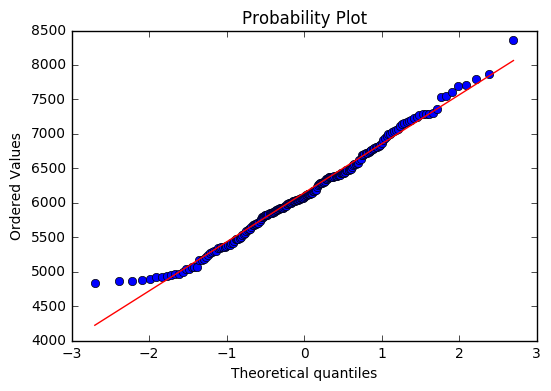

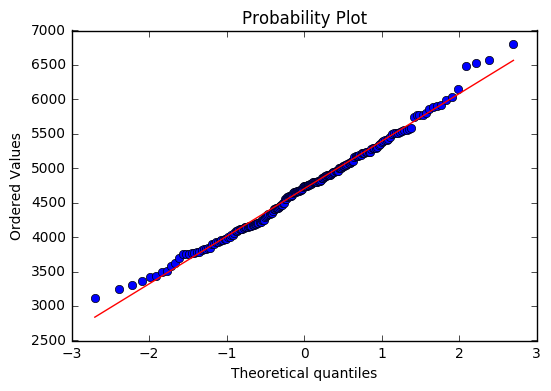

In [94]:
sps.probplot(fst_sample_4, plot=plt)
plt.show()
sps.probplot(snd_sample_4, plot=plt)
plt.show()

In [98]:
sps.shapiro(fst_sample_4) # Rejected

(0.9854623675346375, 0.037434447556734085)

In [99]:
sps.shapiro(snd_sample_4) # Not Rejected

(0.9910486936569214, 0.2528698444366455)

In [100]:
p_values_4 = []
# ----- CORRELATION TESTS ---------- #
p_values_4.append(sps.pearsonr(fst_sample_4, snd_sample_4))
p_values_4.append(sps.spearmanr(fst_sample_4, snd_sample_4))
p_values_4.append(sps.kendalltau(fst_sample_4, snd_sample_4))
# ------NORMALITY TESTS ------------ #
p_values_4.append(sps.shapiro(fst_sample_4))
p_values_4.append(sm.stats.lillifors(fst_sample_4))
p_values_4.append(normal_ad(fst_sample_4))
# snd
p_values_4.append(sps.shapiro(snd_sample_4))
p_values_4.append(sm.stats.lillifors(snd_sample_4))
p_values_4.append(normal_ad(snd_sample_4))
# -------SIMILARITY TESTS -----------
p_values_4.append(sps.wilcoxon(fst_sample_4, snd_sample_4))

p_values_4 = np.array(p_values_4)

In [101]:
multipletests(p_values_4[:,0], alpha=0.1, method='fdr_by')

(array([ True,  True,  True, False, False, False, False, False, False, False], dtype=bool),
 array([-1.30795444, -0.57986256, -0.28309165,  1.        ,  0.28037749,
         1.        ,  1.        ,  0.28037749,  1.        ,  1.        ]),
 0.010480741793785553,
 0.01)

Итого, гипотеза об однородности выборок не отвергается , контролируя FDR на уровне 0.1

### Task 5  Даны 2 независимые выборки из  $t_{10}$. Проверить, можно ли воспользоваться критерием Стюьдента для проверки на однородность данных выборок. С помощью моделирования узнать, как ведет себя уровень значимости критерия при $n \to +\infty$

In [109]:
fst_sample_5 = sps.t(10).rvs(323)
snd_sample_5 = sps.t(10).rvs(323)

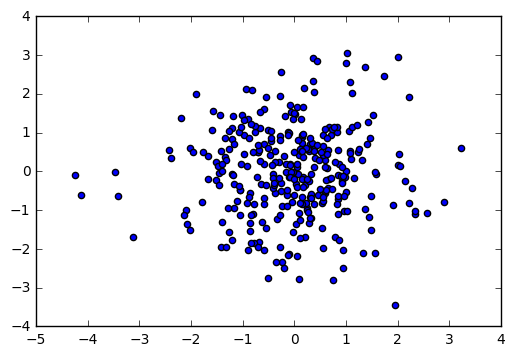

In [110]:
plt.scatter(fst_sample_5, snd_sample_5)
plt.show()

In [113]:
sps.kendalltau(fst_sample_5, snd_sample_5)

KendalltauResult(correlation=0.0044420514201103777, pvalue=0.90519248757231552)

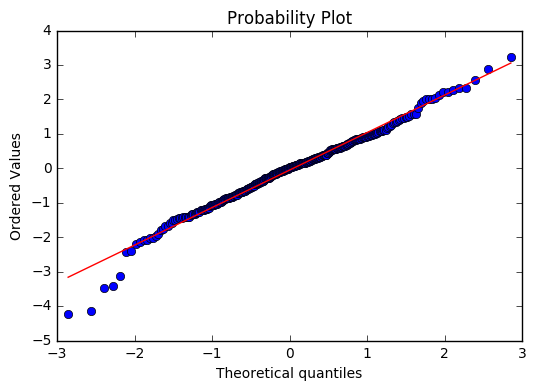

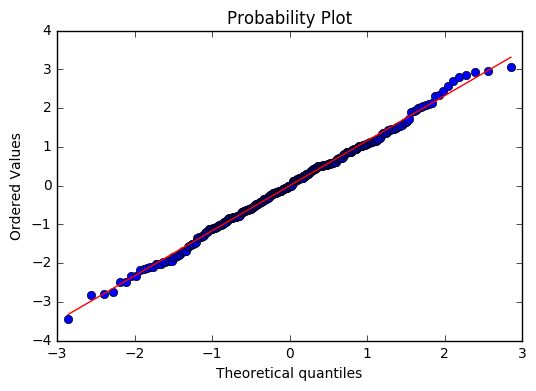

In [118]:
sps.probplot(fst_sample_5, plot=plt)
plt.show()
sps.probplot(snd_sample_5, plot=plt)
plt.show()

Критерий Стьюдента-то можно применить, но мощность его упадет. Вот если бы у нас было не 10 степеней свободы, а хотя бы 30(при таком числе степеней свободы Распределение Стьюдента не отличимо от Нормального), то мощность может бы изменилась, но совсем на чуть-чуть

In [119]:
from tqdm import tqdm

In [147]:
sample_sizes = [(10000, 10),(10000, 20),(10000,30),(10000, 40),(10000,50),(10000,60),(1000,100),(1000,500),(1000,1000)
                ,(500, 3000),(200, 10000),(100,100000)]
results = []
for sample_size in tqdm(sample_sizes):
    fst_smpl = sps.t(10).rvs(size=sample_size)
    snd_smpl = sps.t(10).rvs(size=sample_size)
    results.append((sps.ttest_ind(fst_smpl.T, snd_smpl.T)[1] < 0.05).mean())

100%|██████████| 12/12 [00:04<00:00,  1.04s/it]


In [148]:
results

[0.0516,
 0.049399999999999999,
 0.049399999999999999,
 0.051700000000000003,
 0.051900000000000002,
 0.050200000000000002,
 0.051999999999999998,
 0.047,
 0.043999999999999997,
 0.045999999999999999,
 0.029999999999999999,
 0.040000000000000001]

Видем, что с ростом n лучше ограничивается ошибка первого года, она перестает превышать наши 0.05

### TASK 6 Найти минимальное n при котором можно пользоваться приближением в критерии Колмогорова-Смирнова

Будем это делать с помощью моделирования. Для каждого размера n будем брать 100 выборок и потом проверять принадлежность распределению Колмогорова

In [154]:
from statsmodels.distributions.empirical_distribution import ECDF

In [157]:
fst_sam = sps.gamma(3).rvs(size=n)

In [164]:
ECDF(fst_sam)(np.array([1,3,3,7]))

array([ 0.07407407,  0.58058058,  0.58058058,  0.96096096])

In [186]:
fan = ECDF(fst_sam[0])

In [188]:
fst_sam[0][-1]

3.1104198172611834

In [189]:
fan(fst_sam[0][-11])

0.04004004004004004

In [234]:
def count_stat(sample_1, sample_2):
    n = len(sample_1)
    fst_ecdf_vals = np.array(list(range(1,n + 1))) * 1 / n - ECDF(sample_1)(sorted(sample_2))
    snd_ecdf_vals = np.array(list(range(1,n + 1))) * 1 / n - ECDF(sample_2)(sorted(sample_1))
    return max(max(fst_ecdf_vals), max(snd_ecdf_vals)) #* (np.sqrt(n) / 2.)

In [236]:
for n in tqdm(range(1,100)):
    to_multiple = []
    for i in range(30):
        fst_sam = sps.gamma(3).rvs(size=(100, n))
        snd_sam = sps.gamma(3).rvs(size=(100, n))
        stat_sam = []
        for ind in range(len(fst_sam)):
            stat_sam.append(count_stat(fst_sam[ind], snd_sam[ind]))
#         if sps.kstest(stat_sam, sps.kstwobign.cdf)[1] >= 0.05:
#             print('ez @{}'.format(n))
#             break
        to_multiple.append(sps.kstest(stat_sam, sps.kstwobign.cdf)[1])
    if np.sum(multipletests(to_multiple)[0]) != 30:
        print('here @{}'.format(n))
        break

100%|██████████| 99/99 [01:19<00:00,  1.03s/it]


что-то у меня все время все отвергается